# Happy Costumers
@author: Talardia Gbangou, August 2022

We want to predict (accuracy score >=73%) if a customer is happy or not based on the answers they give to questions asked. This is a classification problem.

# Importing modules

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [253]:
df_train = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [254]:
df_train.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Dara description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

# Exploratory Data Analysis

In [255]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


we have only numerical features

## Missing data
Let's check if there is are missing data

In [256]:
df_train.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Result show that there are no missing data.

Looking at data description, we have only numerical features in the data.

<AxesSubplot:xlabel='Y', ylabel='count'>

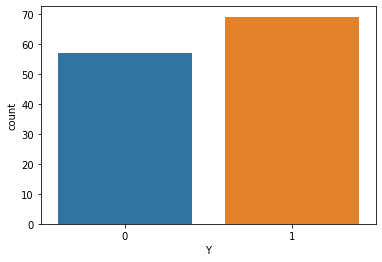

In [257]:
sns.countplot(x='Y',data=df_train)

In [258]:
df_percentage = pd.DataFrame(df_train.Y.value_counts())

In [259]:
df_percentage['Percentage (%)'] = (df_percentage['Y']/df_percentage['Y'].sum())*100

In [260]:
df_percentage

,Y,Percentage (%)
1,69,54.761905
0,57,45.238095


This visualization and percentage statistic show that we have globally more happy customers(1) than unhappy ones(0). We also have balanced data because the difference in count is not much.

# Building and choice of classification models

importing modules

In [261]:
#conda install lightgbm
#conda install xgboost

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

## Overview of several classification models

Training data

In [263]:
X=df_train.drop("Y",axis=1) #features or independent variable
y=df_train["Y"] #target or dependent variable

Train test split of train data

In [264]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

Defining and testing four classification models

In [265]:
print("Logistic Regression Model:")
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_logistic = logmodel.predict(X_val)
accuracy = accuracy_score(predictions_logistic, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("Random Forest Model:")
rforestmodel =  RandomForestClassifier()
rforestmodel.fit(X_train,y_train)
predictions_rforest = rforestmodel.predict(X_val)
accuracy = accuracy_score(predictions_rforest, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("Support Vector Machine (SVM) Model :")
svmmodel = svm.SVC()
svmmodel.fit(X_train,y_train)
predictions_svm = svmmodel.predict(X_val)
accuracy = accuracy_score(predictions_svm, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("Decision tree model :")
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train,y_train)
predictions_dtree = dtreemodel.predict(X_val)
accuracy = accuracy_score(predictions_dtree, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("Gradientboost model :")
gboostmodel = GradientBoostingClassifier()
gboostmodel.fit(X_train,y_train)
predictions_gboost = gboostmodel.predict(X_val)
accuracy = accuracy_score(predictions_gboost, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("Xgboost model:")
xgbmodel = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgbmodel.fit(X_train,y_train)
predictions_xgb = xgbmodel.predict(X_val)
accuracy = accuracy_score(predictions_xgb, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

print("LGBM model:")
lgbmmodel = LGBMClassifier()
lgbmmodel.fit(X_train,y_train)
predictions_lgbm = lgbmmodel.predict(X_val)
accuracy = accuracy_score(predictions_lgbm, y_val)
print("The accuracy of the model is: ", accuracy*100, "%")

Logistic Regression Model:
The accuracy of the model is:  61.53846153846154 %
Random Forest Model:
The accuracy of the model is:  76.92307692307693 %
Support Vector Machine (SVM) Model :
The accuracy of the model is:  61.53846153846154 %
Decision tree model :
The accuracy of the model is:  61.53846153846154 %
Gradientboost model :
The accuracy of the model is:  69.23076923076923 %
Xgboost model:
The accuracy of the model is:  73.07692307692307 %
LGBM model:
The accuracy of the model is:  73.07692307692307 %


Evaluation of different models with the  train_test_split spliting show that Random Forest,Xgboost model, and LGBM model have the best scores(73.07%). This score is for a random_state of 20. The scores can vary with the random state. Therefore, let's apply some parameters tuning with grid search and use cross-validation to ensure stable results on these tree models.

## Tunning selected models parameters

Set up a hyper parameter grid for a random forest classifier

In [266]:
params_grid_rf={
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth': [2, 5, 10],
    'criterion': ['gini','entropy']
}

Create the grid search object for random forest and fit it 

In [267]:

rf_grid=GridSearchCV(RandomForestClassifier(),params_grid_rf,scoring="accuracy",cv=5,verbose=1)
rf_grid.fit(X,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

Evaluation of the random forest model

In [268]:
y_pred_rf=rf_grid.predict(X) 
print("The accuracy of the random forest model is: ", accuracy_score(y,y_pred_rf)*100, "%")

The accuracy of the random forest model is:  63.49206349206349 %


Get the best parameters for random forest model

In [269]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 50}

Set up a hyper parameter grid for xgboost classifier

In [270]:
params_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}


Create the grid search object for xgboost and fit it 

In [271]:
xgb_grid=GridSearchCV(XGBClassifier(eval_metric='mlogloss',use_label_encoder=False),params_xgb,scoring="accuracy",cv=5,verbose=1)
xgb_grid.fit(X,y)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mon...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                          

Evaluation of the xgboost model

In [272]:
y_pred_xgb=xgb_grid.predict(X)
print("The accuracy of the Xgboost model is: ", accuracy_score(y,y_pred_xgb)*100, "%")

The accuracy of the Xgboost model is:  84.92063492063492 %


Get the best parameters for xgboost model

In [273]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 15,
 'n_estimators': 100,
 'reg_alpha': 1.3,
 'reg_lambda': 1.1,
 'subsample': 0.8}

Set up a hyper parameter grid for a lgbm classifier

In [274]:
param_grid_lgbm = {
    'n_estimators': [50,100,150],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [10,20,30],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

Create the grid search object for lgbm model and fit it 

In [275]:
lgbm_grid=GridSearchCV(LGBMClassifier(),param_grid_lgbm,scoring="accuracy",cv=5,verbose=1)
lgbm_grid.fit(X,y)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [10, 20, 30],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]},
             scoring='accuracy', verbose=1)

Evaluation of the xgboost model

In [276]:
y_pred_lgbm=lgbm_grid.predict(X) 
print("The accuracy of the lgbm model is: ", accuracy_score(y,y_pred_lgbm)*100, "%")

The accuracy of the lgbm model is:  65.07936507936508 %


Get the best parameters for lgbm model

In [277]:
lgbm_grid.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 15,
 'min_split_gain': 0.3,
 'n_estimators': 50,
 'num_leaves': 10,
 'reg_alpha': 1.1,
 'reg_lambda': 1.1,
 'subsample': 0.8,
 'subsample_freq': 20}

## Plot graph of feature importances

In [281]:
rforestmodel =  RandomForestClassifier(criterion= 'gini', max_depth = 5, max_features = 'auto', n_estimators= 150)
rforestmodel.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [282]:
print(rforestmodel.feature_importances_)

[0.20237524 0.13826076 0.17146567 0.14086326 0.18214418 0.16489091]


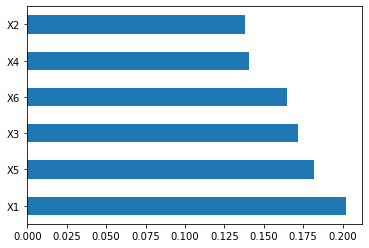

In [283]:
feat_importances = pd.Series(rforestmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

THe barplot show the order of features importance in the data.

Conclusion: We can predict with an accuracy of 84.9% if a customer is happy or not using either the random forest model or the Xgboost model (with the best parameters specified above).